##Read & Clean

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv(r'C:\Users\And\Downloads\Early Suicide Prediction.csv')

In [ ]:
#الفهم العام للبيانات
print(data.head())
print(data.columns)
print(data.shape)

""""
1/ البيانات تابعه لمنظمه الصحه العالميه
2/ تتحدث عن حالات الانتحار حول العالم
3/ البيانات مجمعه من سنة 1985 الي 2016
4/ التصنيفات كتالي

Age العمر   Gender النوع     Stress Level	 مستوي التوتر     Academic Performance	الاداء الدراسي

Health Condition	 الحاله الصحيه    Relationship Condition	 حالة العلاقات     Family Problem	  هل يوجد مشاكل اسريه

Depression Level	 مستوي الاكتئاب   Anxiety Level	   مستوي القلق   Mental Support	  وجود داعم نفسي

Self Harm Story	  وجود اذاء نفسي سابق      Suicide Attempt	   محاوله الانتحار

5/ العمود  المستنتج لبناء النموذج عليه هو (Suicide Attempt)
"""

   Age  Gender Stress Level Academic Performance Health Condition  \
0   22  Female          Low                Good            Normal   
1   23    Male         High                Good              Fair   
2   19  Female     Moderate                 Poor           Normal   
3   18  Female         High              Average         Abnormal   
4   19  Female          Low                Good              Fair   

  Relationship Condition     Family Problem Depression Level Anxiety Level  \
0      In a relationship                NaN           Always        Always   
1                 Single                NaN           Always         Often   
2                Breakup  Parental conflict            Often         Often   
3                 Single          Financial           Always         Often   
4                 Single                NaN        Sometimes     Sometimes   

  Mental Support Self Harm Story Suicide Attempt  
0         Family              No   Never Thought  
1     loneline

'"\n1/ البيانات تابعه لمنظمه الصحه العالميه \n2/ تتحدث عن حالات الانتحار حول العالم \n3/ البيانات مجمعه من سنة 1985 الي 2016\n4/ التصنيفات كتالي \n\nAge العمر   Gender النوع     Stress Level\t مستوي التوتر     Academic Performance\tالاداء الدراسي \n\nHealth Condition\t الحاله الصحيه    Relationship Condition\t حالة العلاقات     Family Problem\t  هل يوجد مشاكل اسريه\n\nDepression Level\t مستوي الاكتئاب   Anxiety Level\t   مستوي القلق   Mental Support\t  وجود داعم نفسي \n\nSelf Harm Story\t  وجود اذاء نفسي سابق      Suicide Attempt\t   محاوله الانتحار \n\n5/ العمود  المستنتج لبناء النموذج عليه هو (Suicide Attempt)\n'

In [ ]:
#اكتشاف البيانات
#حجم البيانات (1099, 12)
print (data.info()) #Family Problem          406      العمود دا فيه يقارب من %50 قيم فارغه
print("number of unique")
print(data.nunique())#الاعمده التي تحتوي علي تصنفات اقصي عدد من التصنفات داخل عمود فريد هو 4
print(data.isnull().sum())

print("data_duplic")
data_duplic=data[data.duplicated()]
print(data_duplic)
print("numbr of dupliced") # يوجد قيم متكراره ولكن ممكن تكون علشان هي اعراض لنفس الحاجه فا افضل عدم حذفهاااا
print(data_duplic.sum(numeric_only=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     1099 non-null   int64 
 1   Gender                  1099 non-null   object
 2   Stress Level            1099 non-null   object
 3   Academic Performance    1099 non-null   object
 4   Health Condition        1099 non-null   object
 5   Relationship Condition  1099 non-null   object
 6   Family Problem          693 non-null    object
 7   Depression Level        1099 non-null   object
 8   Anxiety Level           1099 non-null   object
 9   Mental Support          1099 non-null   object
 10  Self Harm Story         1099 non-null   object
 11  Suicide Attempt         1099 non-null   object
dtypes: int64(1), object(11)
memory usage: 103.2+ KB
None
number of unique
Age                       13
Gender                     2
Stress Level               3
Aca

               Age
count  1099.000000
mean     22.657871
std       6.231228
min      18.000000
25%      21.000000
50%      22.000000
75%      23.000000
max     221.000000


<Axes: >

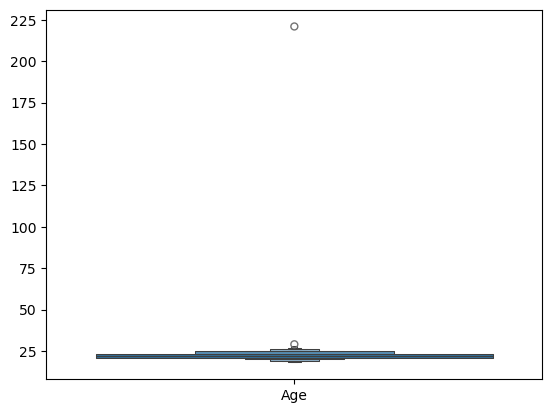

In [ ]:
#الكتشاف القيم الشاذه
print(data.describe())
sns.boxenplot(data=data)
#plt.yscale("log")
#عندنا شخص عمره متعدي 200  دا هيتم حذفه

In [ ]:
#التعامل مع المشاكل
#حذف العمود Family Problem  هو مهم  بس فيه تقريبا 47% فارغ ولو مالته بحاجه ثابته هياثر علي المدل
df=data.copy()
drop_or_ceb_df=df.copy()

#drop_or_ceb_df.dropna(inplace=True,axis=1)
print(drop_or_ceb_df.shape)

#او نحافظ عليه
drop_or_ceb_df['Family Problem'] = drop_or_ceb_df['Family Problem'].fillna('Unknown')
print(drop_or_ceb_df.isnull().sum())
#عندنا خيارين ام نفعل كود الدروب او كود الاكمال الي تلقيه مناسب للنموذج اشتغل عليه انا هكمل علي الاكمال



(1099, 12)
Age                       0
Gender                    0
Stress Level              0
Academic Performance      0
Health Condition          0
Relationship Condition    0
Family Problem            0
Depression Level          0
Anxiety Level             0
Mental Support            0
Self Harm Story           0
Suicide Attempt           0
dtype: int64


               Age
count  1086.000000
mean     22.421731
std       1.648026
min      18.000000
25%      21.000000
50%      22.000000
75%      23.000000
max      26.000000


Text(0.5, 1.0, 'After removing outlrar ')

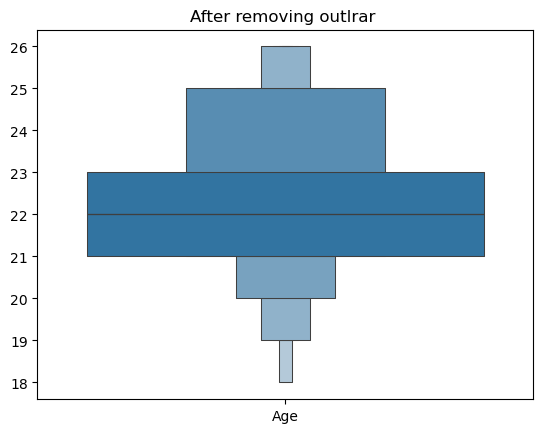

In [ ]:
#حذف القيم الشاذه

Q1 = drop_or_ceb_df['Age'].quantile(0.25)
Q3 = drop_or_ceb_df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


drop_or_ceb_df = data[(drop_or_ceb_df['Age'] >= lower_bound) & (drop_or_ceb_df['Age'] <= upper_bound)]

print(drop_or_ceb_df.describe())
sns.boxenplot(data=drop_or_ceb_df)
plt.title("After removing outlrar ")


In [ ]:
print(drop_or_ceb_df.nunique())


Age                       9
Gender                    2
Stress Level              3
Academic Performance      4
Health Condition          3
Relationship Condition    3
Family Problem            2
Depression Level          4
Anxiety Level             4
Mental Support            3
Self Harm Story           2
Suicide Attempt           3
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

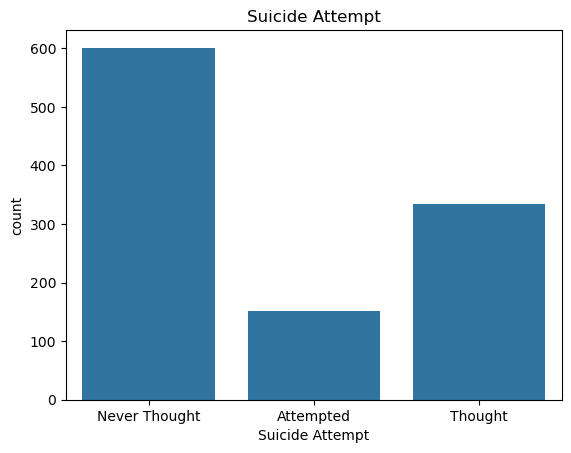

In [ ]:
#مرحله العرض
sns.countplot(x=drop_or_ceb_df["Suicide Attempt"])
plt.title("Suicide Attempt")
plt.show
#يوجد عدم توازن

Text(0.5, 1.0, 'Suicide Attempt vs Age ')

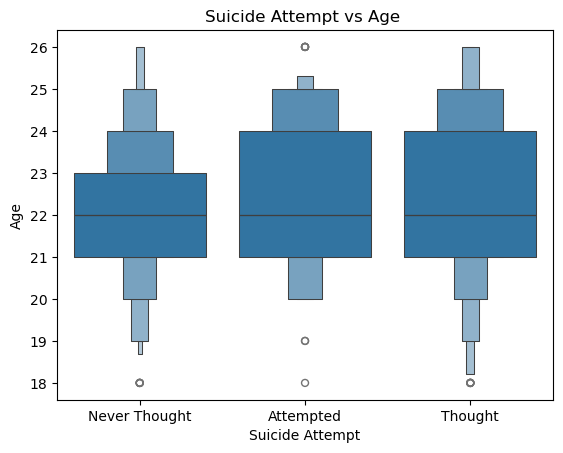

In [ ]:
#علاقه بين العمر وحالات الانتحار
sns.boxenplot(data=drop_or_ceb_df,x="Suicide Attempt",y="Age")
plt.title("Suicide Attempt vs Age ")

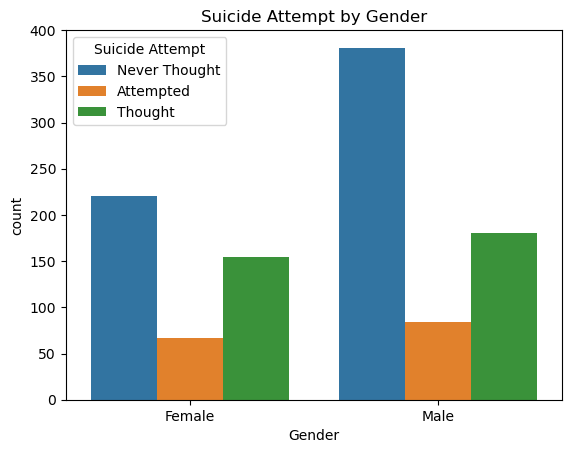

In [ ]:
#تاثير النوع علي معدل الانتحار
sns.countplot(x='Gender', hue='Suicide Attempt', data=drop_or_ceb_df)
plt.title('Suicide Attempt by Gender')
plt.show()

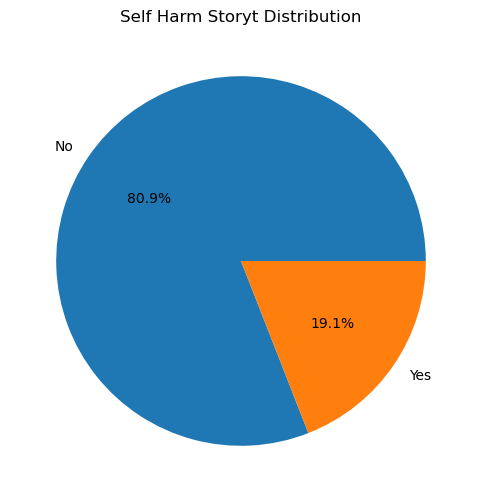

In [ ]:

drop_or_ceb_df['Self Harm Story'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', figsize=(6,6)
)
plt.title('Self Harm Storyt Distribution')
plt.ylabel('')
plt.show()


Text(0.5, 1.0, 'Depression Level vs Age')

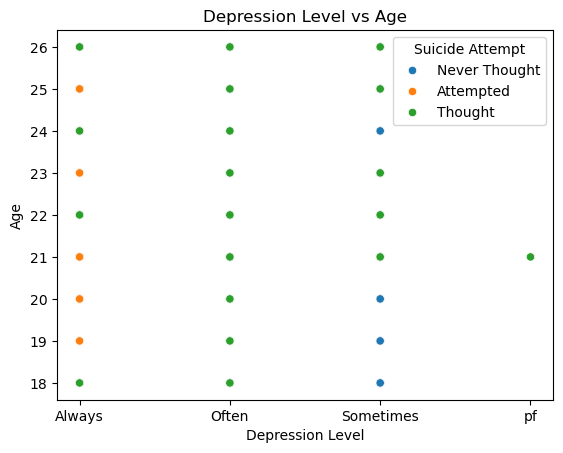

In [ ]:
#علاقه بن العمر مرات الاكتاب  و هل له علاقه بالتفكير في الانتحار
sns.scatterplot(data=drop_or_ceb_df,x="Depression Level",y="Age", hue="Suicide Attempt")
plt.title("Depression Level vs Age")

##One Hot Encoding

In [ ]:
#الانكودر
#كل التصنفات الفريد اقصي عدد فيها هو 4 فاهشتغل one hot
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ["Anxiety Level",'Depression Level','Health Condition','Academic Performance','Stress Level','Gender', 'Mental Support', 'Relationship Condition', 'Family Problem', 'Self Harm Story']

encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(drop_or_ceb_df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
data_numeric = drop_or_ceb_df.drop(columns=categorical_cols)
final_df = pd.concat([data_numeric.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
final_df# دي اخر داتا ست فيها كل التعديلات

#  ملحوظه لو هتشتغل في الموديل علي الاسقطا العمود الي فيه فيم فارغه الي اسمهFamily Problem متنساش تحذفه من الليست الي هتدخل علي الانكودر علشان متعملش مشكله




,Age,Suicide Attempt,Anxiety Level_Always,Anxiety Level_Often,Anxiety Level_Sometimes,Anxiety Level_sometimes,Depression Level_Always,Depression Level_Often,Depression Level_Sometimes,Depression Level_pf,...,Mental Support_Friends,Mental Support_loneliness,Relationship Condition_Breakup,Relationship Condition_In a relationship,Relationship Condition_Single,Family Problem_Financial,Family Problem_Parental conflict,Family Problem_nan,Self Harm Story_No,Self Harm Story_Yes
0,22,Never Thought,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,23,Attempted,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,19,Thought,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,18,Thought,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,19,Never Thought,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,26,Thought,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1082,22,Thought,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1083,23,Thought,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1084,25,Thought,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
final_df['Suicide Attempt'].value_counts()

Suicide Attempt
Never Thought    601
Thought          334
Attempted        151
Name: count, dtype: int64

In [ ]:
final_df['Suicide Attempt'].replace(['Never Thought', 'Thought', 'Attempted'], [0, 1, 2], inplace=True)

C:\Users\And\AppData\Local\Temp\ipykernel_12860\1017557421.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['Suicide Attempt'].replace(['Never Thought', 'Thought', 'Attempted'], [0, 1, 2], inplace=True)
C:\Users\And\AppData\Local\Temp\ipykernel_12860\1017557421.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_sile

##Split

In [ ]:
X=final_df.drop(columns=['Suicide Attempt'])
y=final_df['Suicide Attempt']

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X = sc_X.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42,max_depth=10, min_samples_leaf= 10,min_samples_split=15)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8302752293577982
Confusion Matrix:
 [[111   7   0]
 [ 19  44   6]
 [  1   4  26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       118
           1       0.80      0.64      0.71        69
           2       0.81      0.84      0.83        31

    accuracy                           0.83       218
   macro avg       0.82      0.81      0.81       218
weighted avg       0.83      0.83      0.82       218



###Decision Tree After Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
ros = RandomOverSampler(
    sampling_strategy='minority',random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

rus= RandomUnderSampler(
    sampling_strategy='majority',random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

In [ ]:
print("Resampled X shape:", X_resampled.shape)
print("Resampled y shape:", y_resampled.shape)

Resampled X shape: (1269, 32)
Resampled y shape: (1269,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42,max_depth=10, min_samples_leaf= 10,min_samples_split=15)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

####Decision Tree After GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 10],
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))

Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 15}
Best Model Accuracy: 0.8385826771653543


##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, min_samples_leaf=10, min_samples_split=15)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8582677165354331
Random Forest Confusion Matrix:
 [[ 60  13   0]
 [ 11  46  10]
 [  0   2 112]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83        73
           1       0.75      0.69      0.72        67
           2       0.92      0.98      0.95       114

    accuracy                           0.86       254
   macro avg       0.84      0.83      0.83       254
weighted avg       0.85      0.86      0.86       254



###Random Forest With GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))

Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Model Accuracy: 0.8818897637795275


##TEST Decision Tree&Random Forest with Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42,max_depth=10, min_samples_leaf= 10,min_samples_split=15)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8307086614173228
Confusion Matrix:
 [[ 60  13   0]
 [ 14  42  11]
 [  0   5 109]]


In [ ]:
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, min_samples_leaf=1, min_samples_split=5)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.8818897637795275
Random Forest Confusion Matrix:
 [[ 62  11   0]
 [ 12  48   7]
 [  0   0 114]]


##Neural Network

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import callbacks
model = Sequential(
    [
        Dense(256, activation='relu', input_shape=(X_resampled.shape[1],)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='tanh'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(3, activation='softmax')  # Assuming 3 classes
    ]
)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True
    )

c:\Users\And\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping]
        )

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5248 - loss: 0.9826 - val_accuracy: 0.5413 - val_loss: 0.8208
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5917 - loss: 0.7182 - val_accuracy: 0.7477 - val_loss: 0.6194
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7857 - loss: 0.5426 - val_accuracy: 0.7569 - val_loss: 0.5400
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7892 - loss: 0.4680 - val_accuracy: 0.7569 - val_loss: 0.5795
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7810 - loss: 0.5015 - val_accuracy: 0.7706 - val_loss: 0.4406
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8422 - loss: 0.3841 - val_accuracy: 0.7477 - val_loss: 0.4899
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8268 - loss: 0.4016 - val_accuracy: 0.8165 - val_loss: 0.4194
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8526 - loss: 0.3646 - val_accuracy: 0.8028 - val_loss

###NN With sampling

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping]
        )

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8870 - loss: 0.2866 - val_accuracy: 0.8386 - val_loss: 0.3756
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8756 - loss: 0.3051 - val_accuracy: 0.8858 - val_loss: 0.3147
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8778 - loss: 0.2903 - val_accuracy: 0.8346 - val_loss: 0.4260
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8684 - loss: 0.3153 - val_accuracy: 0.8858 - val_loss: 0.3024
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8839 - loss: 0.2865 - val_accuracy: 0.8661 - val_loss: 0.3419
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8813 - loss: 0.2954 - val_accuracy: 0.8780 - val_loss: 0.3070
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8951 - loss: 0.2520 - val_accuracy: 0.8898 - val_loss: 0.3131
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8789 - loss: 0.2813 - val_accuracy: 0.8740 - val_loss:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout ,BatchNormalization
from tensorflow.keras import callbacks
model2 = Sequential(
    [
        Dense(256, activation='relu', input_shape=(X_resampled.shape[1],)),
        Dropout(0.7),
        BatchNormalization(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(3, activation='softmax')  # Assuming 3 classes
    ]
)
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True
    )

c:\Users\And\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model2.fit(X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping]
        )

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.4815 - loss: 1.0303 - val_accuracy: 0.7244 - val_loss: 0.8892
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7187 - loss: 0.7184 - val_accuracy: 0.7402 - val_loss: 0.6980
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7361 - loss: 0.5876 - val_accuracy: 0.8386 - val_loss: 0.5992
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7887 - loss: 0.4894 - val_accuracy: 0.8071 - val_loss: 0.4688
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8214 - loss: 0.4501 - val_accuracy: 0.8268 - val_loss: 0.4188
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8641 - loss: 0.3503 - val_accuracy: 0.8504 - val_loss: 0.3721
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8391 - loss: 0.4057 - val_accuracy: 0.8386 - val_loss: 0.3866
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8457 - loss: 0.3983 - val_accuracy: 0.8661 - val_loss

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout ,BatchNormalization
from tensorflow.keras import callbacks
model2 = Sequential(
    [
        Dense(256, activation='relu', input_shape=(X_resampled.shape[1],)),
        Dropout(0.5),
        BatchNormalization(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(3, activation='softmax')  # Assuming 3 classes
    ]
)
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True
    )

In [ ]:
model2.fit(X_train, y_train,
        epochs=50,
        batch_size=64,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping]
        )

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.2605 - loss: 1.2271 - val_accuracy: 0.2874 - val_loss: 1.1732
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2494 - loss: 1.1155 - val_accuracy: 0.2874 - val_loss: 1.1050
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3230 - loss: 1.0838 - val_accuracy: 0.3740 - val_loss: 1.0714
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4662 - loss: 1.0539 - val_accuracy: 0.6693 - val_loss: 1.0642
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5790 - loss: 0.9786 - val_accuracy: 0.6102 - val_loss: 1.0620
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6692 - loss: 0.9212 - val_accuracy: 0.6417 - val_loss: 1.0293
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8111 - loss: 0.7760 - val_accuracy: 0.6772 - val_loss: 0.9147
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8265 - loss: 0.5767 - val_accuracy: 0.7402 - val_l